<a href="https://colab.research.google.com/github/ctalamilla/uba-ceia-apdmq1-tpfinal/blob/main/ceia_apdm1_tpfinal_Polvo_Mina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo práctico final Apredizaje de Máquinas



##Integrantes

a1822 Cristian Patricio Salinas Talamilla

a1812 Ezequiel Eduardo Maudet

a1811 Marcelo Adrián Más Valdecantos

a1806 Lucas Fajardo

a1826 Sebastian Carreras

## Información sobre el dataset

Los datos provienen de varias estaciones meteorologicas ubicadas al rededor de una mina.
El analisis de laboratorio de los datos de las estaciones meteorologicas demoran 20 dias en reportar los resultados de si el contenido de polvo en la atmosfera esta por arriba de los niveles permitidos.
Este algoritmo busca predecir si el nivel de polvo esta por arriba o no del limite permitido utilizando mediciones indirectas e instantaneas de las estaciones meteorológicas para tomar medidas de mitigación. Inmediatas y no luego de 20 días como se hace normalmente y donde las condiciones del clima cambiaron al momento de la toma de decisión.

Contexto:
Mina XXX posee una red de monitoreo ambiental la cual permite medir los impactos ambientales de la actividad. En el presente repositorio se trabajará solo con las mediciones de polvo ambiental (PM10 - material particulado menor a 10 micrones).

El proyecto minero cuenta con mediciones de PM10 desde el año 2008 hasta la actualidad. La frecuencia de monitoreo ha variado con el pasar de los años pero siempre al menos se han colecado 3 muestras por mes de cada sitio.

El objetivo de estas mediciones es conocer el impacto del proyecto minero en el ambiente en lo relacionado a la generación de emisiones de PM10. En el siguiente gráfico se puede apreciar las mediciones del sitio NP3 a lo largo del tiempo. Cabe destacar que el nivel regulatorio establece que por encima de los 150 ugr/m3 se considera un impacto que debe ser controlado.

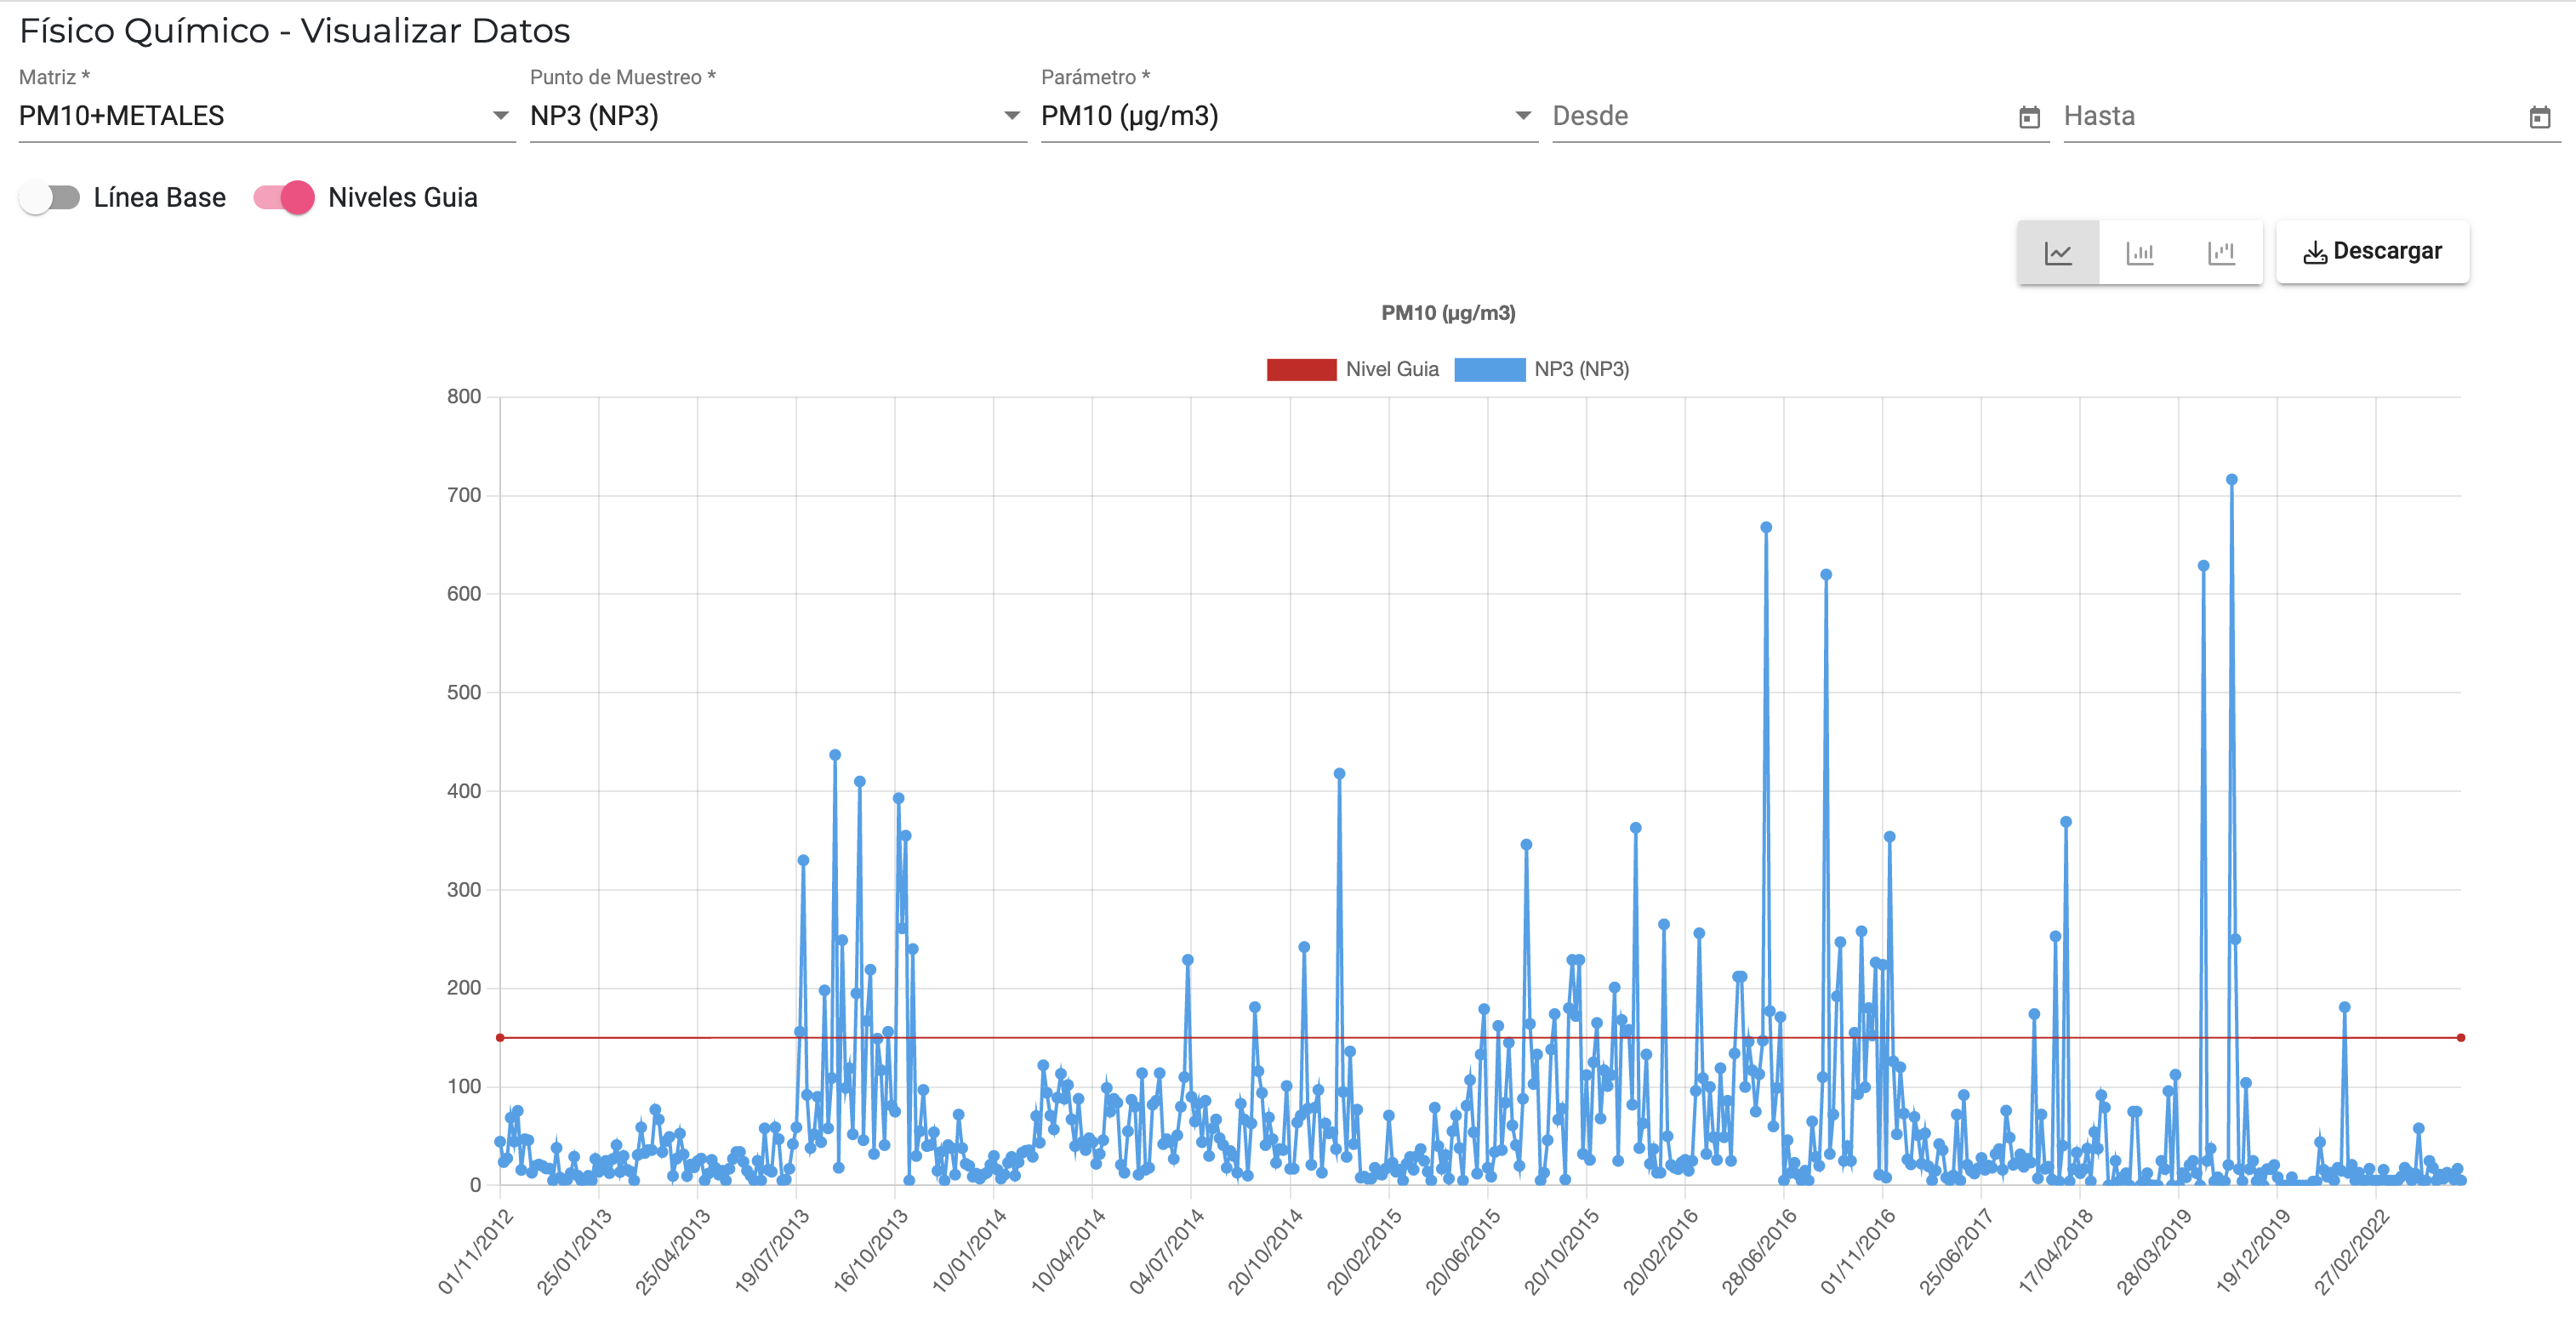

Las mediciones de PM10 están fuertemente relacionadas con las variables climaticas y con el impacto de la actividad minera. Es decir, los dias o las temporadas de mayor viento y sequedad es cuando mayores valores de PM10 se han registrado.

Haciendo uso de herramientas de ML se intentará predecir si el valor de PM10 está por encima de 150 ug/m3 a partir de variables climaticas o meteorologias. Es necesario destacar que la empresa cuenta con una estación meteorológica con datos en tiempo real de las condiciones atmosféricas.

De esta manera y de manera conceptual el trabajo de busca entrenar un modelo a partir del registro historico de PM10 y las variables meteorológicas como lo muestra la siguiente figura.

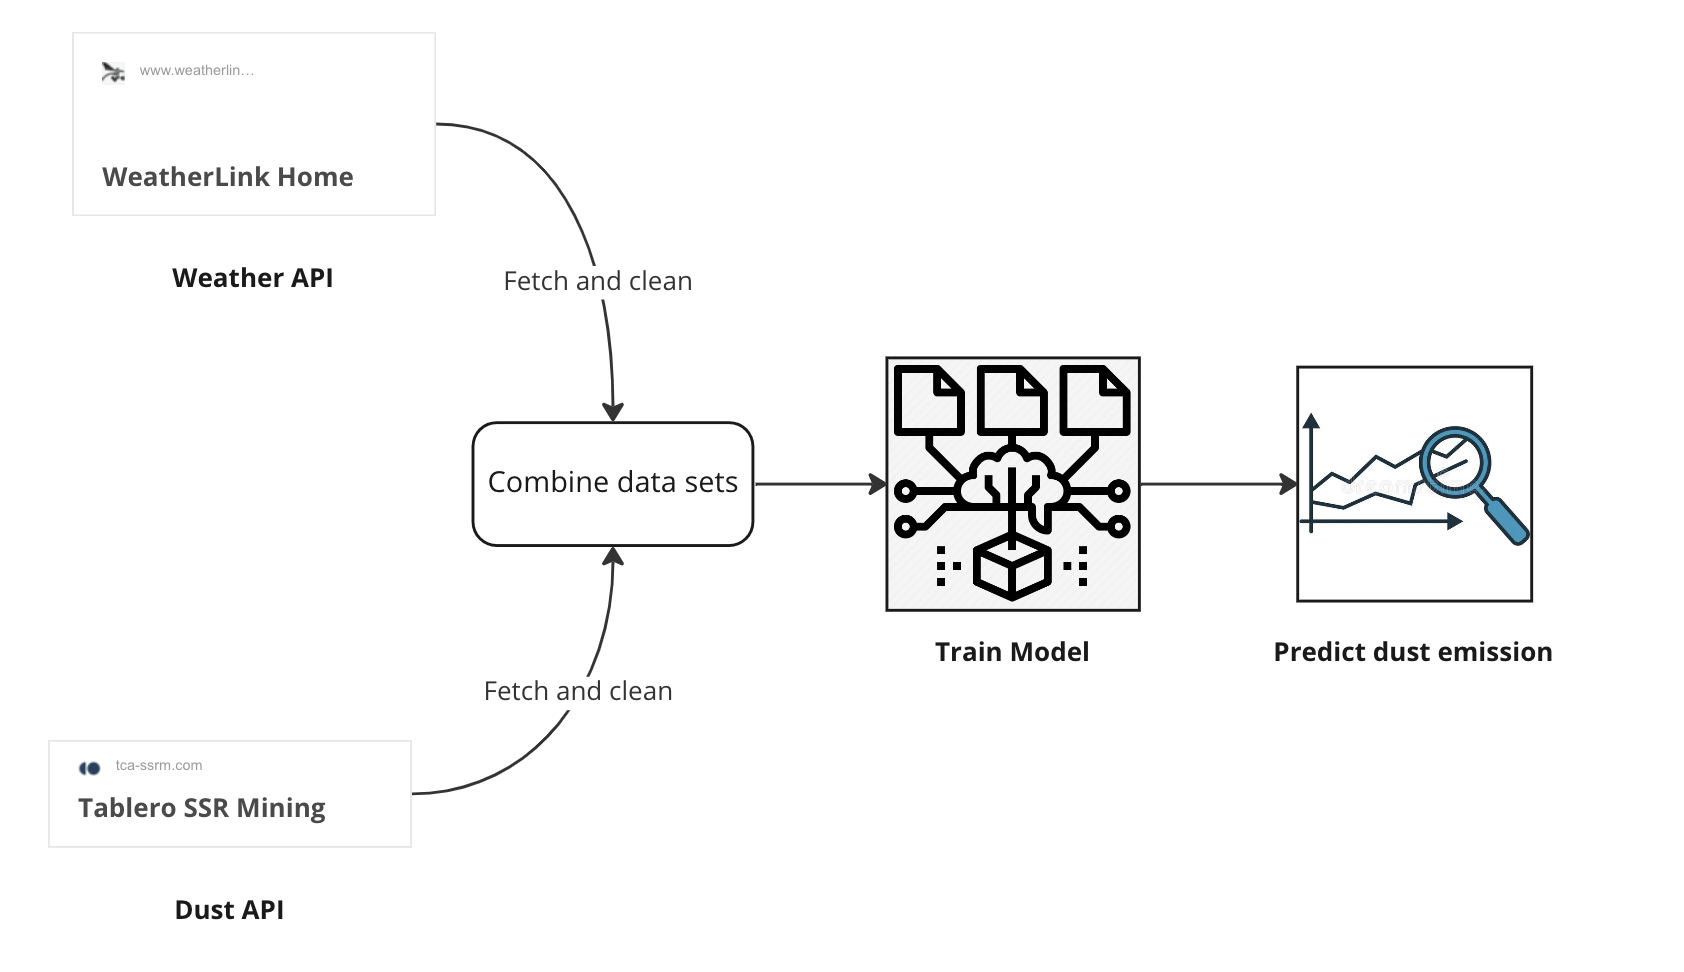

Con esta información se entrenara un modelo de clasificación para predecir, a partir de los datos de la estación meteorológica, si el valor de PM10 estará por encima de los 150 ugr/m3.

Es necesario resaltar que de acuerdo con el método de muestro de PM10 es necesario contar con instrumentos especificos y con analisis de laborario lo cual demora en la obtención del resultado. Es decir, a la empresa de demanda al menos 20 dias entre que colectó una muestra de PM10 hasta que obtiene el resultado. Este tiempo no permite tomar decisiones a tiempo para controlar los impactos.

De acuerdo a esto la principal importancia del modelo radica en estimar, con cierta insertidumbre conocida, a partir de las variables atmosféricas el comportamiento de la generación de polvo. Esto permitiría obtener información sincronizada con la estación meteorológica y no depender del resultado de laboratorio.

El trabajo de ETL (extraccion, transformacion y carga) esta desarrollado en la siguiente notebook:
https://colab.research.google.com/drive/1NwpRFfKccns_u2IiYayqKOn-4_o95FMd?usp=sharing



In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM' -O df_merged.csv

--2024-12-15 12:51:01--  https://docs.google.com/uc?export=download&id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM
Resolving docs.google.com (docs.google.com)... 142.251.16.100, 142.251.16.113, 142.251.16.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM&export=download [following]
--2024-12-15 12:51:01--  https://drive.usercontent.google.com/download?id=1gT8k90Iisd-sZVXWtS6Exl1ZFwwTd_WM&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 958834 (936K) [application/octet-stream]
Saving to: ‘df_merged.csv’

df_merged.csv       100%[===================>] 936.36K  --.-KB/s    i

In [10]:
!wget https://raw.githubusercontent.com/ctalamilla/uba-ceia-apdmq1-tpfinal/main/auxiliary.py -O auxiliary.py


--2024-12-15 13:04:35--  https://raw.githubusercontent.com/ctalamilla/uba-ceia-apdmq1-tpfinal/main/auxiliary.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3008 (2.9K) [text/plain]
Saving to: ‘auxiliary.py’

auxiliary.py        100%[===================>]   2.94K  --.-KB/s    in 0s      

2024-12-15 13:04:35 (40.3 MB/s) - ‘auxiliary.py’ saved [3008/3008]



In [4]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Personalizar las etiquetas del eje x para mostrar solo meses y años
from matplotlib.dates import MonthLocator, DateFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from auxiliary import plot_boundary, plot_svm_margins
import optuna
import seaborn as sns

##Primer analisis de los datos

In [12]:
df_polvo = pd.read_csv('df_merged.csv')

In [13]:
df_polvo.head(3)

,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WDir,WRun,WHSpeed,...,ET,WSamp,WTx,iRecept,arcInt,WDir_deg,HWDir_deg,Punto,Polvo_PM10,clase
0,2008-02-23,9.800000,18.3,2.7,53.0,-0.058140,7.337500,E,176.18,69.2,...,5.13,28825,1,86.533333,30,90.0,NaN,20V,5.0,False
1,2008-02-26,8.797872,15.7,3.6,56.0,-0.334043,9.547917,ENE,229.26,88.5,...,3.72,32973,1,99.150000,30,67.5,90.0,20V,33.0,False
2,2008-02-29,7.970455,19.1,-1.5,28.5,-11.086364,12.936957,S,297.67,61.2,...,12.84,30625,1,95.478261,30,180.0,90.0,20V,13.0,False


In [16]:
df_polvo['Date'] = pd.to_datetime(df_polvo['Date'])

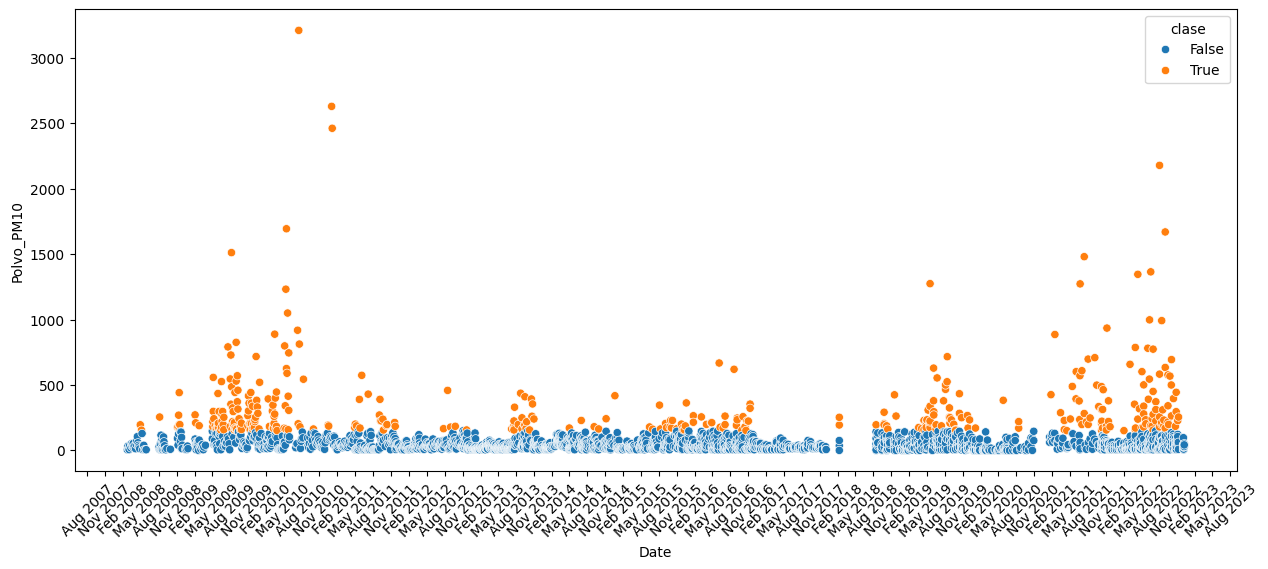

In [23]:
# Crear el gráfico con seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_polvo, x='Date', y='Polvo_PM10', hue='clase')

# Personalizar las etiquetas del eje x para reducir la cantidad
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))  # Mostrar etiquetas cada 3 meses
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Formato "Mes Año" (ej. "Jan 2024")

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [24]:
#Se eliminan columnas de direccion de viento (ya estan en numericas en grados) y columna nivel de polvo
df_polvo.drop(columns=['WDir','HWDir', 'Polvo_PM10' ], inplace=True)

In [25]:
# Imputar los valores nulos únicamente en las columnas numéricas
numerical_cols = df_polvo.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas
df_polvo[numerical_cols] = df_polvo[numerical_cols].fillna(df_polvo[numerical_cols].mean())

In [26]:
df_polvo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3006 non-null   datetime64[ns]
 1   TempOut    3006 non-null   float64       
 2   HiTemp     3006 non-null   float64       
 3   LowTemp    3006 non-null   float64       
 4   OutHum     3006 non-null   float64       
 5   DewPt.     3006 non-null   float64       
 6   WSpeed     3006 non-null   float64       
 7   WRun       3006 non-null   float64       
 8   WHSpeed    3006 non-null   float64       
 9   WChill     3006 non-null   float64       
 10  HeatIx     3006 non-null   float64       
 11  ThwIx      3006 non-null   float64       
 12  ThswI      3006 non-null   float64       
 13  Bar        3006 non-null   float64       
 14  Rain       3006 non-null   float64       
 15  SolRate    3006 non-null   float64       
 16  SolRad.    3006 non-null   float64       


In [27]:
df_polvo.isnull().sum()

,0
Date,0
TempOut,0
HiTemp,0
LowTemp,0
OutHum,0
DewPt.,0
WSpeed,0
WRun,0
WHSpeed,0
WChill,0


## Support vector machine

### Analisis preliminar

Hacemos una copia  del dataset tratado para trabajar con este modelo

In [28]:
df_polvo_svm =  df_polvo.copy()
df_polvo_svm

,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,...,iHeat,ET,WSamp,WTx,iRecept,arcInt,WDir_deg,HWDir_deg,Punto,clase
0,2008-02-23,9.800000,18.3,2.7,53.0,-0.058140,7.337500,176.18,69.2,2.6,...,22.6,5.13,28825,1,86.533333,30,90.0,203.228849,20V,False
1,2008-02-26,8.797872,15.7,3.6,56.0,-0.334043,9.547917,229.26,88.5,2.9,...,16.2,3.72,32973,1,99.150000,30,67.5,90.000000,20V,False
2,2008-02-29,7.970455,19.1,-1.5,28.5,-11.086364,12.936957,297.67,61.2,-1.9,...,20.6,12.84,30625,1,95.478261,30,180.0,90.000000,20V,False
3,2008-03-03,5.885417,13.4,-1.9,54.0,-3.410417,8.783333,210.79,62.8,-2.5,...,13.0,3.57,33406,1,100.000000,30,112.5,135.000000,20V,False
4,2008-03-06,5.006250,13.4,-2.4,15.0,-19.485417,14.245833,341.96,53.1,-5.8,...,13.2,4.88,33047,1,99.529167,30,225.0,202.500000,20V,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2022-12-06,-2.231250,5.8,-10.7,17.5,-23.920833,2.400000,57.86,24.1,-10.4,...,27.7,2.64,33461,1,99.958333,30,67.5,0.000000,STO-D,False
3002,2022-12-06,-2.231250,5.8,-10.7,17.5,-23.920833,2.400000,57.86,24.1,-10.4,...,27.7,2.64,33461,1,99.958333,30,67.5,0.000000,CIEN,False
3003,2022-12-08,5.708333,15.3,-5.6,19.0,-15.991667,17.264583,414.40,70.8,-6.6,...,24.8,6.06,33504,1,100.000000,30,315.0,337.500000,CHIN,False
3004,2022-12-08,5.708333,15.3,-5.6,19.0,-15.991667,17.264583,414.40,70.8,-6.6,...,24.8,6.06,33504,1,100.000000,30,315.0,337.500000,OROS,False


Creamos una nueva feature a partir de 'Date' para tener la fecha de tipo float64, la nombraremos como 'Date_num', necesitamos hacer esto para tener como indice la fecha y poder trabajar con el modelo.

In [29]:
df_polvo_svm['Date_num'] = df_polvo_svm['Date'].apply(lambda x: x.timestamp())  # Convertir a timestamp (segundos desde 1970)
df_polvo_svm['Date_num'] = pd.to_numeric(df_polvo_svm['Date_num'], errors='coerce')
df_polvo_svm = df_polvo_svm.drop(columns=['Date'])
df_polvo_svm = df_polvo_svm.drop(columns=['Punto', 'HiTemp', 'LowTemp', 'WTx','SolRate','SolRad.','arcInt'])

Eliminamos features que consideramos que no aportan información relevante o que no son numéricas.

### Separamos los datos de entrenamiento y testeo, y escalamos.

Procedemos a separar el dataset en un set de entrenamiento y de testeo.

In [33]:
X = df_polvo_svm.iloc[:, :-1]  # Características (input)
y = df_polvo_svm.iloc[:, -2]   # Etiquetas o target (output)

# X: Matriz de características (features)
# y: Vector de etiquetas (labels)

# Separar los datos (80% entrenamiento, 20% prueba)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=42)

# Ver los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train_svm))
print("Tamaño del conjunto de prueba:", len(X_test_svm))

Tamaño del conjunto de entrenamiento: 2104
Tamaño del conjunto de prueba: 902


SVM necesita que los datos sean escalados, escalamos los datos de testeo y entrenamiento entonces.

In [34]:
scaler = StandardScaler()

X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

### Clasificador de vector de soportes

Antes de pasar a SVM, vamos a probar con "Clasificador de vector de soportes" [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), vamos a definir el caso lineal con C=10 primero

In [35]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train_svm, y_train_svm)


scores = cross_val_score(svm_linear, X_train_svm, y_train_svm, cv=5, scoring='accuracy')

y_pred_svm = svm_linear.predict(X_test_svm)

print("Confusion Matrix:")
print(confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test_svm, y_pred_svm))


Confusion Matrix:
[[787   0]
 [  0 115]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      1.00      1.00       115

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902



Observamos que los resultados son perfectos, por lo tanto, no confiamos en el ajuste que hace este modelo, ahora vamos a probar con un C=0.001 para ajusta la precisión

In [36]:
svm_linear = SVC(C=0.001, kernel='linear')
svm_linear.fit(X_train_svm, y_train_svm)


scores = cross_val_score(svm_linear, X_train_svm, y_train_svm, cv=5, scoring='accuracy')

y_pred = svm_linear.predict(X_test_svm)

print("Confusion Matrix:")
print(confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test_svm, y_pred_svm))

Confusion Matrix:
[[787   0]
 [  0 115]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      1.00      1.00       115

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902



Aquí también obtenemos resultados perfectos, por lo tanto, los resultados no son confiables

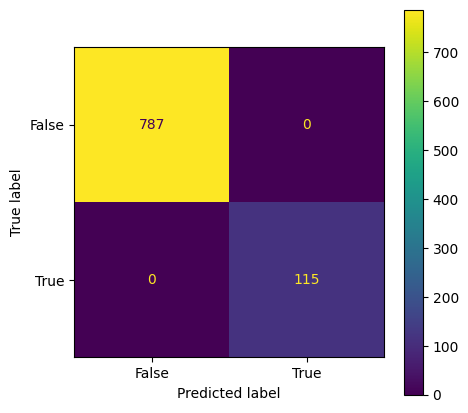

In [37]:
cm = confusion_matrix(y_test_svm, y_pred_svm, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

Como se obtiene el mismo resultado, elegimos trabajar entonces con Support Vector Machine. A continúacion se intentará graficar los datos segun las 2 primeras features

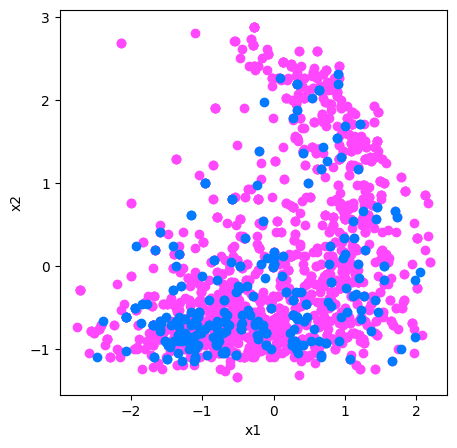

In [38]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_svm[y_train_svm==0][:,0], X_train_svm[y_train_svm==0][:,1], c="#ff48fd")
ax.scatter(X_train_svm[y_train_svm==1][:,0], X_train_svm[y_train_svm==1][:,1], c="#007aff")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

### Optimización de parametros con GridSearch y Radial Basis Function (RBF) kernel

In [42]:
svm_kbf = SVC(kernel='rbf')

grid = GridSearchCV(svm_kbf,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
                     "gamma": [0.5, 1, 2, 3, 4]},
                    refit=True,
                    cv=5,
                    scoring='f1')
grid.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.5, 1, 2, 3, 4]},
             scoring='f1')

Obtenemos los mejores parametros *gamma* y *C* y todos los scores.

In [43]:
grid.best_params_


{'C': 5, 'gamma': 0.5}

In [44]:
grid.cv_results_['mean_test_score']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.60445188, 0.47007917, 0.46200759, 0.46200759, 0.46200759,
       0.65909498, 0.47899732, 0.46200759, 0.46200759, 0.46200759,
       0.65909498, 0.47899732, 0.46200759, 0.46200759, 0.46200759,
       0.65909498, 0.47899732, 0.46200759, 0.46200759, 0.46200759])

### Gráficos

Finalmente intentamos graficar y ver como performa este modelo usando los mejores parametros.

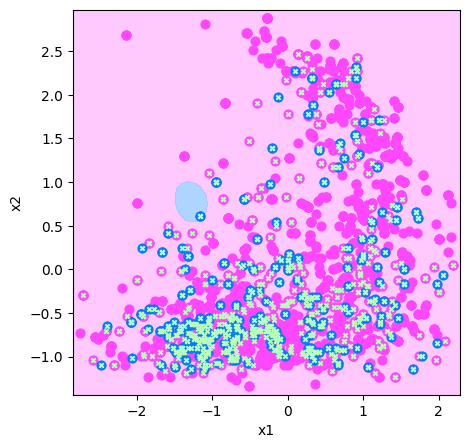

In [45]:
#X_train_2D = X_train[:, :2]  # Usar las dos primeras características
#X_test_2D = X_test[:, :2]

X_train_2D = X_train_svm[:, [0, 1]]  # Selecciona columnas 28 (Date_num) y 3 (WSpeed)
X_test_2D = X_test_svm[:, [0, 1]]

svm_rbf_best_2D = SVC(kernel='rbf', C=5, gamma=5)  # Ajusta según el mejor modelo encontrado
svm_rbf_best_2D.fit(X_train_2D, y_train_svm)
plot_boundary(X_train_2D, y_train_svm, svm_rbf_best_2D,
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Graficar los vectores de soporte
plt.scatter(svm_rbf_best_2D.support_vectors_[:, 0],
            svm_rbf_best_2D.support_vectors_[:, 1],
            marker="x", color="#b8ffb7", s=10)

plt.show()


### Testeo y resultados

In [208]:
confusion_matrix(y_test_svm, y_pred_svm, labels=svm_rbf_best.classes_)

array([[787,   0],
       [ 58,  57]])

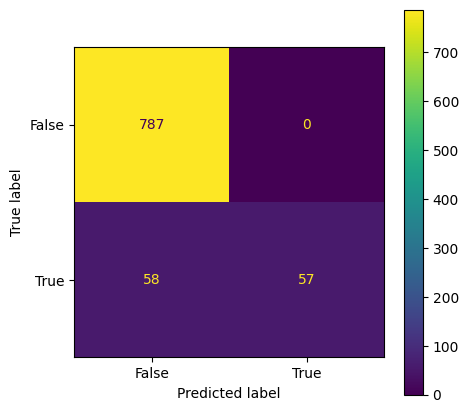

In [46]:
svm_rbf_best = grid.best_estimator_

y_pred_svm = svm_rbf_best.predict(X_test_svm)

cm = confusion_matrix(y_test_svm, y_pred_svm, labels=svm_rbf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [47]:
# Evaluación del modelo optimizado
#print("Matriz de confusión (modelo optimizado):")
#print(confusion_matrix(y_test_svm, y_pred_svm))

print("\nReporte de clasificación (modelo optimizado):")
print(classification_report(y_test_svm, y_pred_svm))

print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test_svm, y_pred_svm))


Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       787
        True       1.00      0.50      0.66       115

    accuracy                           0.94       902
   macro avg       0.97      0.75      0.81       902
weighted avg       0.94      0.94      0.93       902


Precisión del modelo optimizado:
0.9356984478935698


**Se agrega manualmente, por que todo el codigo se encuentra ejecutado con optimizaciones que demoran. Estan seteados los randomstate por lo cual no deberian cambiar las metricas.**

In [211]:
resultados_modelos = {'SVM': {'cm':[[787,   0],[ 58,  57]],
                             'precision':  0.93 ,
                             'recall': 0.5,
                             'f1-score': 0.66 }}

In [212]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66}}

Conclusión: La Precisión del modelo optimizado es muy alta, lo que nos lleva a sospechar que no está haciendo una buena predicción, a continuación vamos a probar con otros modelos para determinar cuál puede darnos algo más parecido a la realidad.

## Arboles de Decision

### Analisis preliminar

In [48]:
df_polvo_arbol=df_polvo.copy()

Agregamos una columna con la semana del año para no perder la temporalidad

In [49]:
# Reemplaza la columna 'date' con la semana del año
df_polvo_arbol['Week'] = df_polvo_arbol['Date'].dt.isocalendar().week

# Imprime el DataFrame actualizado para verificar los cambios
print(df_polvo_arbol.head())

        Date   TempOut  HiTemp  LowTemp  OutHum     DewPt.     WSpeed    WRun  \
0 2008-02-23  9.800000    18.3      2.7    53.0  -0.058140   7.337500  176.18   
1 2008-02-26  8.797872    15.7      3.6    56.0  -0.334043   9.547917  229.26   
2 2008-02-29  7.970455    19.1     -1.5    28.5 -11.086364  12.936957  297.67   
3 2008-03-03  5.885417    13.4     -1.9    54.0  -3.410417   8.783333  210.79   
4 2008-03-06  5.006250    13.4     -2.4    15.0 -19.485417  14.245833  341.96   

   WHSpeed  WChill  ...     ET  WSamp  WTx     iRecept  arcInt  WDir_deg  \
0     69.2     2.6  ...   5.13  28825    1   86.533333      30      90.0   
1     88.5     2.9  ...   3.72  32973    1   99.150000      30      67.5   
2     61.2    -1.9  ...  12.84  30625    1   95.478261      30     180.0   
3     62.8    -2.5  ...   3.57  33406    1  100.000000      30     112.5   
4     53.1    -5.8  ...   4.88  33047    1   99.529167      30     225.0   

    HWDir_deg  Punto  clase  Week  
0  203.228849    20V

In [50]:
df_polvo_arbol['Rain'] = (df_polvo_arbol['Rain'] > 0).astype(int)

In [51]:
# Contar la cantidad total de elementos en la columna
total_elementos = df_polvo_arbol['Rain'].count()

# Sumar los valores de la columna (cantidad de 1's)
suma_elementos = df_polvo_arbol['Rain'].sum()

# Imprimir los resultados
print(f"Total de elementos: {total_elementos}")
print(f"Suma de elementos (cantidad de 1's): {suma_elementos}")

Total de elementos: 3006
Suma de elementos (cantidad de 1's): 481


Label Encoder de la variable Punto que identifica la estacion meteorologica.

In [52]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# List of columns containing string values
string_columns = [ 'Punto']

# Encode the string columns to numerical values
for col in string_columns:
    df_polvo_arbol[col] = le.fit_transform(df_polvo_arbol[col])

In [53]:
X = df_polvo_arbol.drop(['Date', 'clase' ], axis=1)
y = df_polvo_arbol['clase']

### Implementación Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
# Entrenar el árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Obtener las importancias de las características
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print(importances)

Punto        0.283594
Bar          0.072932
Week         0.051247
inTemp       0.046871
iHeat        0.045112
ET           0.044020
WSamp        0.041358
WHSpeed      0.041271
HiSlE        0.031883
WRun         0.031685
OutHum       0.023171
WSpeed       0.021863
SolRad.      0.021666
LowTemp      0.021200
ThwIx        0.020608
DewPt.       0.020464
HiTemp       0.019023
inDew        0.017771
WDir_deg     0.017555
WChill       0.015835
hetD-D       0.015648
inHum        0.015273
HWDir_deg    0.012250
Rad.         0.011699
HeatIx       0.010408
TempOut      0.009732
uDose        0.009716
ThswI        0.006228
iRecept      0.005712
hiUV         0.005017
uvIndex      0.004288
SolRate      0.002618
Rain         0.002285
colD-D       0.000000
WTx          0.000000
arcInt       0.000000
dtype: float64


### Técnica RFE (Recursive Feature Elimination) para identificar los Features más relevantes.

In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X, y)

# Mostrar las columnas seleccionadas
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['DewPt.', 'WSpeed', 'WHSpeed', 'Bar', 'inDew', 'iHeat', 'ET', 'WSamp',
       'Punto', 'Week'],
      dtype='object')


Usamos las Features más relevantes para modelizar y simplificar el modelo.

In [56]:
# Crear un nuevo DataFrame con las columnas seleccionadas
X_selected = X[selected_features]

### Grafica utilizando T-SNE

In [57]:
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


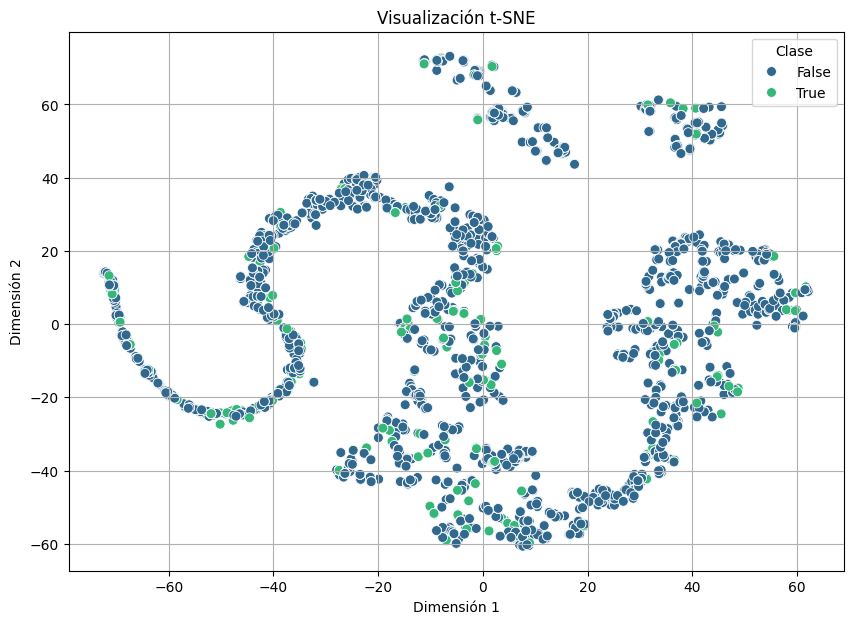

In [58]:
# Crea un imputer que reemplaza los NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')

# Fit entrene el imputer con los datos y los transforma
X_selected_imputed = imputer.fit_transform(X_selected)

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_selected_imputed)

# Crear un DataFrame para la visualización
df_visual = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_visual['clase'] = df_polvo_arbol['clase'].values

# Visualización
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', hue='clase', palette='viridis', data=df_visual, s=50)
plt.title('Visualización t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()

Se gráfico con T-SNE pero no se ve una clara separación de clases, lo que indica que el modelo podría ser difícil de entrenar.

### Testeo y resultados

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import resample

In [60]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Creando un Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion='gini',             # 'gini' para Impureza Gini o 'entropy' para ganancia de información
    splitter='best',              # 'best' para la mejor división o 'random' para dividir al azar
    max_depth=8,               # Profundidad máxima del árbol (p.ej., 5 para limitar el crecimiento)
    min_samples_split=2,          # Mínimo número de muestras necesarias para dividir un nodo
    min_samples_leaf=1,           # Mínimo número de muestras requeridas en una hoja
    min_weight_fraction_leaf=0.002, # Mínima fracción de peso requerido en una hoja
    max_features=10,            # Número de características a considerar al buscar la mejor división
    max_leaf_nodes=None,          # Número máximo de nodos hoja
    min_impurity_decrease=0.002,    # Reducción mínima de impureza para dividir un nodo
    class_weight='balanced',      # Ponderación de clases para manejar desbalanceo
    random_state=42               # Asegura reproducibilidad
)


In [63]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_features=10,
                       min_impurity_decrease=0.002,
                       min_weight_fraction_leaf=0.002, random_state=42)

In [64]:
# Making predictions
y_pred = clf.predict(X_test)

In [65]:
# Evaluating the model
report_arbol_RFE = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_score_arbol_RFE = accuracy_score(y_test, y_pred)

In [66]:
print(conf_matrix)

[[537 256]
 [ 33  76]]


In [67]:
print(report_arbol_RFE)

              precision    recall  f1-score   support

       False       0.94      0.68      0.79       793
        True       0.23      0.70      0.34       109

    accuracy                           0.68       902
   macro avg       0.59      0.69      0.57       902
weighted avg       0.86      0.68      0.73       902



In [68]:
print("\nPrecisión del modelo:")
print(accuracy_score_arbol_RFE)


Precisión del modelo:
0.6796008869179601


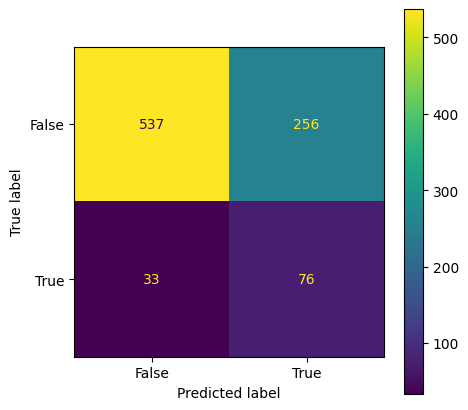

In [69]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [214]:
resultados_modelos['Arboles'] = {'cm': [[537, 256],[ 33 , 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34}

In [215]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34}}

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

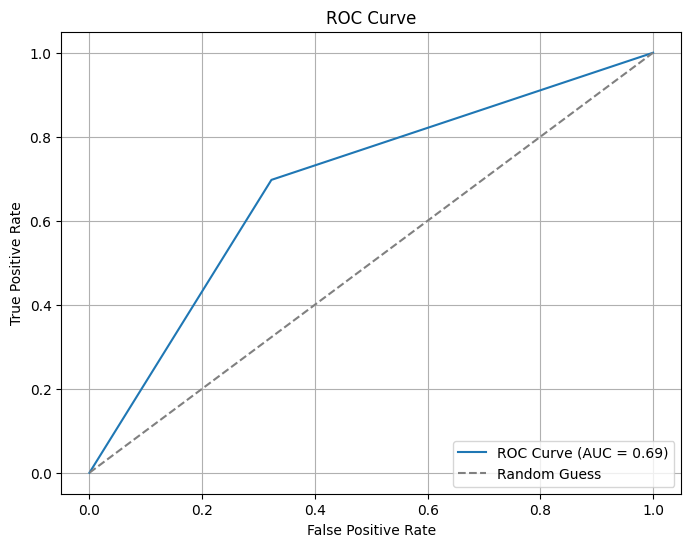

In [71]:
# Calcular el área bajo la curva ROC
auc_score = roc_auc_score(y_test, y_pred)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

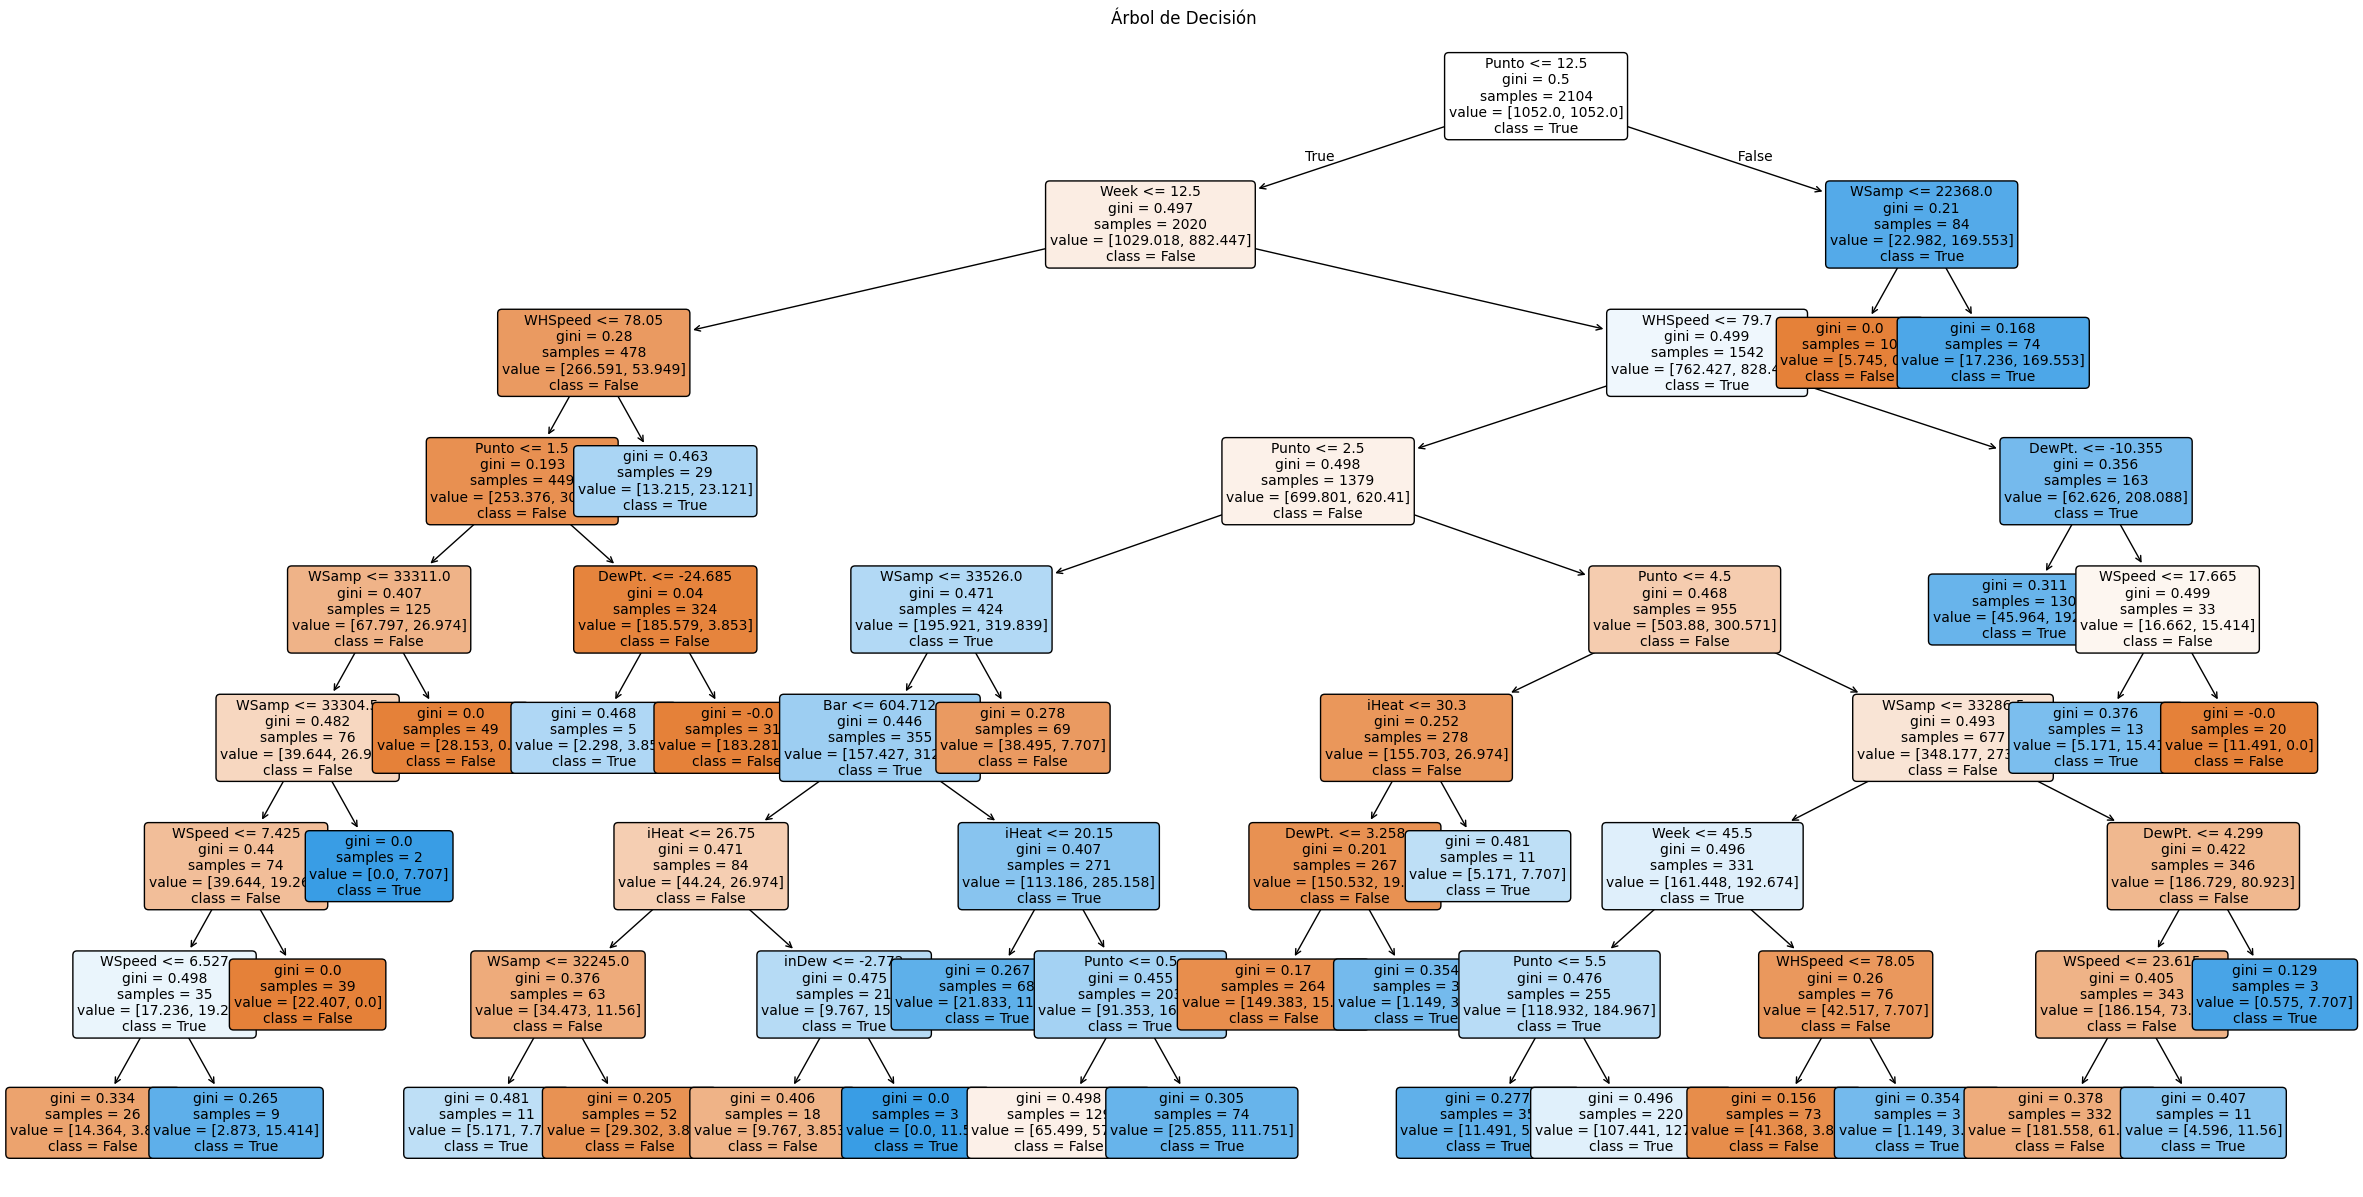

In [76]:
# Graficar el árbol
plt.figure(figsize=(30, 15))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=clf.classes_.astype(str),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión")
plt.show()

### Implementación de Forward Chaining Cross-Validation

Se separa un 10% de los datos para el test final.

In [77]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [78]:
# Definir las divisiones de tiempo
n_splits = 5  # Número de particiones para validación cruzada
tscv = TimeSeriesSplit(n_splits=n_splits)

# Variables para almacenar resultados
reports = []
conf_matrices = []

# Fat Forward Cross-Validation
for train_index, test_index in tscv.split(X_train):
    # Separar conjuntos de entrenamiento y validación
    X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el modelo
    clf.fit(X_train1, y_train1)

    # Hacer predicciones
    y_pred = clf.predict(X_test1)

    # Evaluar el modelo
    report = classification_report(y_test1, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test1, y_pred)

    # Almacenar resultados
    reports.append(report)
    conf_matrices.append(conf_matrix)

# Análisis de resultados
for i, (report, conf_matrix) in enumerate(zip(reports, conf_matrices), start=1):
    print(f"\n=== Fold {i} ===")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)

# Promediar métricas (opcional)
avg_precision = np.mean([report['weighted avg']['precision'] for report in reports])
avg_recall = np.mean([report['weighted avg']['recall'] for report in reports])
avg_f1 = np.mean([report['weighted avg']['f1-score'] for report in reports])

print(f"\n=== Final Metrics ===")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1-Score: {avg_f1:.2f}")



=== Fold 1 ===
Classification Report:
{'False': {'precision': 0.9081272084805654, 'recall': 0.8426229508196721, 'f1-score': 0.8741496598639455, 'support': 305.0}, 'True': {'precision': 0.2835820895522388, 'recall': 0.4222222222222222, 'f1-score': 0.3392857142857143, 'support': 45.0}, 'accuracy': 0.7885714285714286, 'macro avg': {'precision': 0.5958546490164021, 'recall': 0.6324225865209472, 'f1-score': 0.6067176870748299, 'support': 350.0}, 'weighted avg': {'precision': 0.8278285503326377, 'recall': 0.7885714285714286, 'f1-score': 0.8053814382896015, 'support': 350.0}}
Confusion Matrix:
[[257  48]
 [ 26  19]]

=== Fold 2 ===
Classification Report:
{'False': {'precision': 0.9182879377431906, 'recall': 0.7539936102236422, 'f1-score': 0.8280701754385965, 'support': 313.0}, 'True': {'precision': 0.17204301075268819, 'recall': 0.43243243243243246, 'f1-score': 0.24615384615384617, 'support': 37.0}, 'accuracy': 0.72, 'macro avg': {'precision': 0.5451654742479394, 'recall': 0.5932130213280373

In [79]:
# Making predictions
y_pred = clf.predict(X_test)

In [80]:
# Evaluating the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [81]:
print(report)

              precision    recall  f1-score   support

       False       0.95      0.69      0.80       793
        True       0.24      0.72      0.36       109

    accuracy                           0.69       902
   macro avg       0.59      0.70      0.58       902
weighted avg       0.86      0.69      0.74       902



In [83]:
print(conf_matrix)

[[545 248]
 [ 31  78]]


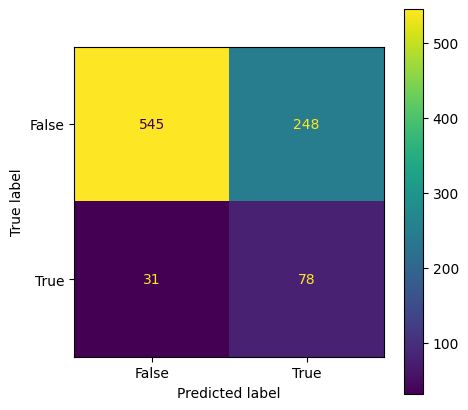

In [84]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [216]:
resultados_modelos['Arboles-5FCV'] = {'cm': [[545,248],[ 31  , 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36}

In [217]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34},
 'Arboles-5FCV': {'cm': [[545, 248], [31, 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36}}

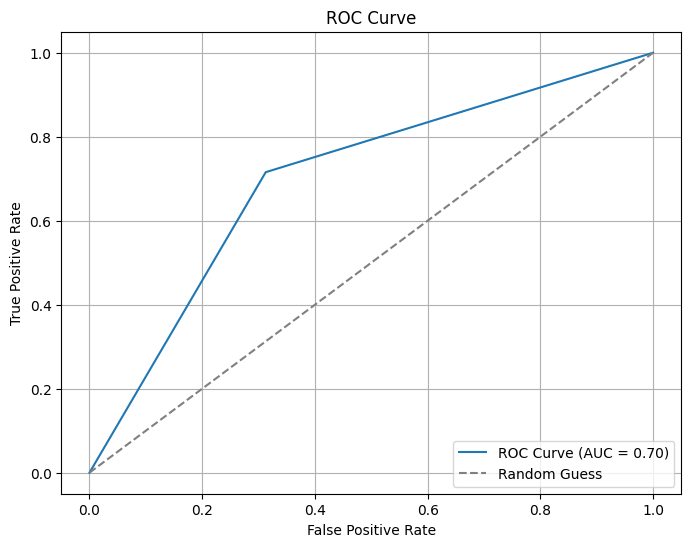

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular el área bajo la curva ROC
auc_score = roc_auc_score(y_test, y_pred)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Conclusión

En el modelo de arbol se probaron distintas configuraciones, la mas robusta fue el entrenado con los features mas relevantes hayados mediante RandomForest. Se mantuvo La curva Roc tanto en el test como la validacion. Esto demuestra una mejor generalizacion.
En los casos donde se hizo balanceo de clases y donde se utilizaron todos los features los resultados de la curva ROC, no se mantuvieron en los datos de Validación con lo cual el modelo no generalizaba y daba resultados inferiores.
La técnica mejoro con la aplicación de Forward Chaining Cross-Validation.

## Random Forest

### Analisis preliminar

In [86]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [87]:
# Preprocesamiento
# One-Hot Encoding para la columna categórica 'Punto'
data = pd.get_dummies(df_polvo, columns=['Punto'], drop_first=True)

In [88]:
data.head(2)

,Date,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,...,Punto_DCOLAS,Punto_DOMO,Punto_LIV,Punto_NP3,Punto_NP4,Punto_OROS,Punto_OROS2,Punto_S-MINA,Punto_STO-D,Punto_VETA
0,2008-02-23,9.800000,18.3,2.7,53.0,-0.058140,7.337500,176.18,69.2,2.6,...,False,False,False,False,False,False,False,False,False,False
1,2008-02-26,8.797872,15.7,3.6,56.0,-0.334043,9.547917,229.26,88.5,2.9,...,False,False,False,False,False,False,False,False,False,False


In [89]:
# Separar variables predictoras y objetivo
X = data.drop(columns=['clase', 'Date'])  # Eliminamos la columna 'Date' si no aporta
y = data['clase']

### Testeo y resultados

In [96]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
X_train = X_train.astype(int) # Converts all columns to int to avoid the mismatch

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [99]:
# Entrenar el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [100]:
# Realizar predicciones
y_pred = random_forest.predict(X_test)

In [101]:
# Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de confusión:
[[734  53]
 [ 76  39]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92       787
        True       0.42      0.34      0.38       115

    accuracy                           0.86       902
   macro avg       0.67      0.64      0.65       902
weighted avg       0.84      0.86      0.85       902


Precisión del modelo:
0.8569844789356984


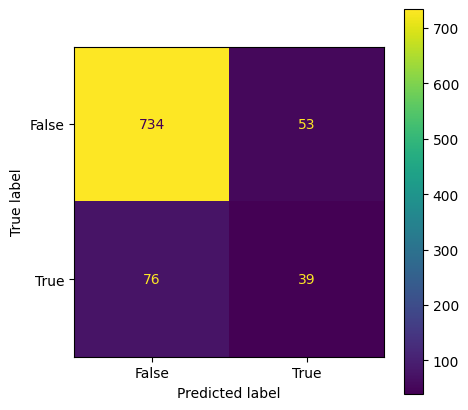

In [102]:
cm = confusion_matrix(y_test, y_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [218]:
resultados_modelos['RFC'] = {'cm': [[734 , 53], [ 76 , 39]],
  'precision': 0.42,
  'recall': 0.34,
  'f1-score': 0.38}

In [219]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34},
 'Arboles-5FCV': {'cm': [[545, 248], [31, 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36},
 'RFC': {'cm': [[734, 53], [76, 39]],
  'precision': 0.42,
  'recall': 0.34,
  'f1-score': 0.38}}

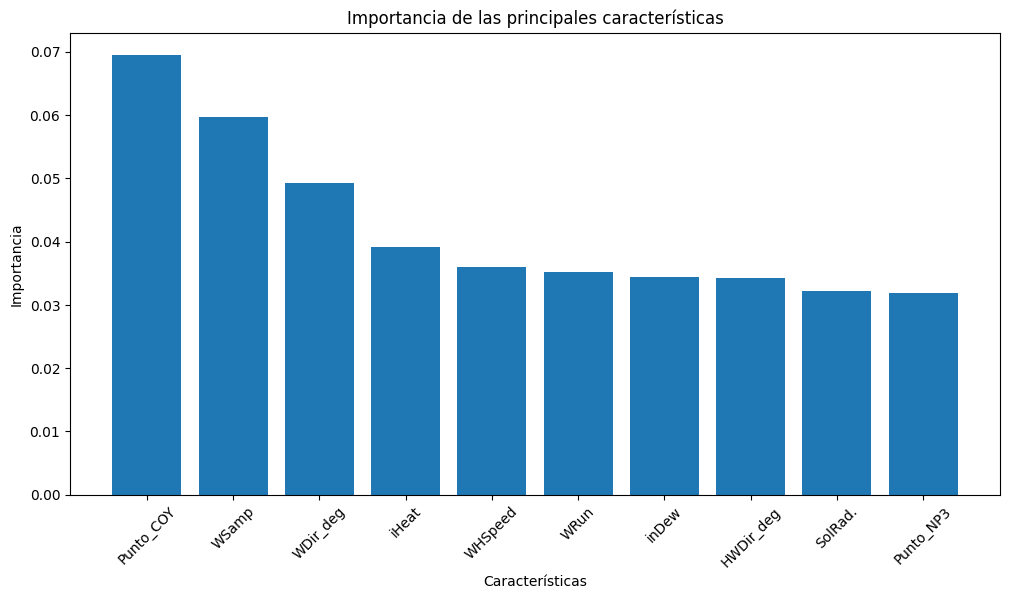

In [103]:
feature_importances = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X.columns[sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(features[:10], feature_importances[sorted_idx][:10])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las principales características")
plt.xticks(rotation=45)
plt.show()

### Optimizacion con RandomSearch

#### Implementación

In [106]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [107]:
# Definir el modelo base
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

In [109]:
# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo de muestras en una hoja
    'max_features': ['sqrt']  # Selección de características
}

In [111]:
# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid,  # Se usa el mismo rango de parámetros
    n_iter=2000,  # Número de combinaciones aleatorias a probar
    cv=5,  # Validación cruzada con 5 divisiones
    scoring='f1',  # Métrica para evaluar
    verbose=3,  # Mostrar progreso
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42  # Para reproducibilidad
)

In [112]:
# Ejecutar la búsqueda por grilla
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 108 is smaller than n_iter=2000. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=3)

In [114]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:" )
random_search.best_params_

Mejores hiperparámetros:


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

#### Testeo y resultado

In [115]:
# Evaluar el modelo optimizado en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

In [116]:
# Evaluación del modelo optimizado
print("Matriz de confusión (modelo optimizado):")
print(confusion_matrix(y_test, y_pred_optimized))

report_random_forest_optimized_hp = classification_report(y_test, y_pred_optimized)
print("\nReporte de clasificación (modelo optimizado):")
print(classification_report(y_test, y_pred_optimized))

accuracy_random_forest_optimized_hp = accuracy_score(y_test, y_pred_optimized)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred_optimized))

Matriz de confusión (modelo optimizado):
[[720  67]
 [ 73  42]]

Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       787
        True       0.39      0.37      0.38       115

    accuracy                           0.84       902
   macro avg       0.65      0.64      0.64       902
weighted avg       0.84      0.84      0.84       902


Precisión del modelo optimizado:
0.844789356984479


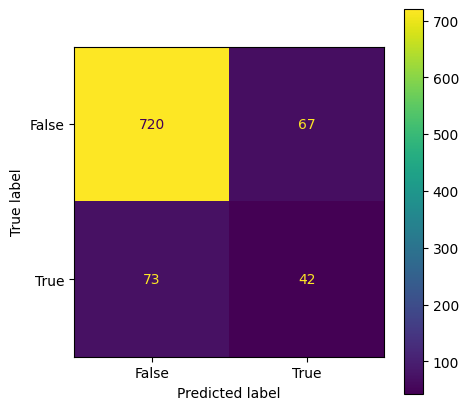

In [117]:
cm = confusion_matrix(y_test, y_pred_optimized, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [220]:
resultados_modelos['RFC-HT'] = {'cm': [[720 , 67],[ 73, 42]],
  'precision': 0.39,
  'recall': 0.37,
  'f1-score': 0.38}

In [221]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34},
 'Arboles-5FCV': {'cm': [[545, 248], [31, 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36},
 'RFC': {'cm': [[734, 53], [76, 39]],
  'precision': 0.42,
  'recall': 0.34,
  'f1-score': 0.38},
 'RFC-HT': {'cm': [[720, 67], [73, 42]],
  'precision': 0.39,
  'recall': 0.37,
  'f1-score': 0.38}}

### SMOTE(Synthetic Minority Over-sampling Technique)  - Compensacion desbalance

In [118]:
# Aplicar SMOTE - se agrega nueva data para balancear el dagtaset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [119]:
X_train_balanced.describe()

,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,HeatIx,...,Punto_DCOLAS,Punto_DOMO,Punto_LIV,Punto_NP3,Punto_NP4,Punto_OROS,Punto_OROS2,Punto_S-MINA,Punto_STO-D,Punto_VETA
count,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,...,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000
mean,5.397387,13.466249,-1.647795,29.319815,-12.563691,12.150789,305.797224,59.652422,-2.722646,11.038378,...,0.004627,0.025857,0.020958,0.127382,0.050626,0.022591,0.008710,0.001633,0.036745,0.051443
std,3.091570,3.590695,3.401776,18.664018,8.166315,7.750402,186.370352,21.366859,3.863037,2.940354,...,0.067875,0.158731,0.143263,0.333445,0.219263,0.148616,0.092932,0.040384,0.188160,0.220929
min,-2.000000,4.000000,-13.000000,5.000000,-30.000000,0.000000,0.000000,0.000000,-22.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,-4.000000,17.000000,-19.000000,6.000000,163.000000,46.000000,-6.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,14.000000,-1.000000,22.000000,-15.000000,10.000000,261.000000,58.000000,-3.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,16.000000,0.000000,36.000000,-7.000000,16.000000,400.000000,72.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,70.000000,11.000000,91.000000,5.000000,40.000000,981.000000,289.000000,7.000000,19.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
# Modelo con ajuste de pesos
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

#### Recalculamos los mejores hyperparametros

In [121]:
# Búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [122]:
# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=random_forest,         # Modelo base
    param_distributions=param_grid,  # Rango de parámetros
    n_iter=2000,                       # Número de combinaciones aleatorias a probar
    cv=5,                            # Validación cruzada con 5 divisiones
    scoring='f1',                    # Métrica para clases desbalanceadas
    verbose=3,                       # Mostrar progreso detallado
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42                  # Para reproducibilidad
)

In [123]:
# Entrenar con datos balanceados
random_search.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 81 is smaller than n_iter=2000. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=3)

In [125]:
print(random_search.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)


#### Testeo y resultados

In [126]:
# Resultados
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [128]:
print("Mejores hiperparámetros:", random_search.best_params_)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest_optimized_hp_smote = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest_optimized_hp_smote = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Matriz de confusión:
[[727  60]
 [ 78  37]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       787
        True       0.38      0.32      0.35       115

    accuracy                           0.85       902
   macro avg       0.64      0.62      0.63       902
weighted avg       0.84      0.85      0.84       902


Precisión del modelo optimizado:
0.8470066518847007

ROC-AUC: 0.757836583614165


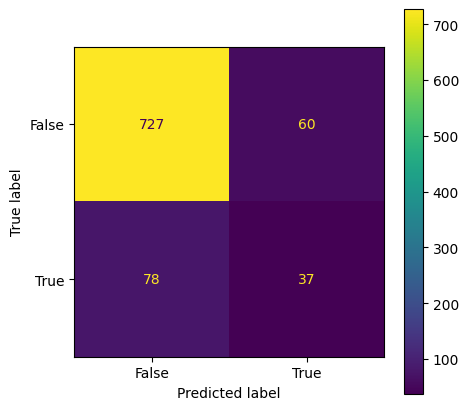

In [129]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [222]:
resultados_modelos['RFC-HT-OSamp'] = {'cm': [[727 , 60],[ 78 , 37]],
  'precision': 0.38,
  'recall': 0.32,
  'f1-score': 0.35}

In [223]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34},
 'Arboles-5FCV': {'cm': [[545, 248], [31, 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36},
 'RFC': {'cm': [[734, 53], [76, 39]],
  'precision': 0.42,
  'recall': 0.34,
  'f1-score': 0.38},
 'RFC-HT': {'cm': [[720, 67], [73, 42]],
  'precision': 0.39,
  'recall': 0.37,
  'f1-score': 0.38},
 'RFC-HT-OSamp': {'cm': [[727, 60], [78, 37]],
  'precision': 0.38,
  'recall': 0.32,
  'f1-score': 0.35}}

### Otimización con Under Sampler

In [130]:
from imblearn.under_sampling import RandomUnderSampler

In [131]:
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

In [132]:
X_train_balanced.describe()

,TempOut,HiTemp,LowTemp,OutHum,DewPt.,WSpeed,WRun,WHSpeed,WChill,HeatIx,...,Punto_DCOLAS,Punto_DOMO,Punto_LIV,Punto_NP3,Punto_NP4,Punto_OROS,Punto_OROS2,Punto_S-MINA,Punto_STO-D,Punto_VETA
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,5.543071,13.629213,-1.799625,29.649813,-12.602996,12.498127,310.350187,60.295880,-2.833333,11.217228,...,0.005618,0.063670,0.037453,0.174157,0.074906,0.033708,0.013109,0.001873,0.043071,0.104869
std,3.136216,3.495530,3.674250,18.940784,8.418892,8.059988,193.668095,23.650411,4.041568,2.965974,...,0.074812,0.244394,0.190048,0.379600,0.263487,0.180645,0.113847,0.043274,0.203208,0.306672
min,-1.000000,4.000000,-13.000000,9.000000,-30.000000,0.000000,0.000000,0.000000,-13.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,-4.000000,17.000000,-19.000000,6.000000,163.000000,46.000000,-6.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,14.000000,-1.000000,22.000000,-14.000000,10.000000,262.000000,59.000000,-3.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,16.000000,1.000000,37.000000,-6.250000,17.000000,408.000000,74.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,21.000000,7.000000,91.000000,5.000000,39.000000,949.000000,289.000000,6.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
# Modelo con ajuste de pesos
random_forest = RandomForestClassifier(random_state=42, class_weight= 'balanced_subsample')

#### Recalculamos los hyperparametros

In [134]:
# Búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [135]:
# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=random_forest,  # Modelo base
    param_distributions=param_grid,  # Espacio de búsqueda
    n_iter=2000,  # Número de combinaciones aleatorias a probar
    cv=5,  # Validación cruzada con 5 divisiones
    scoring='f1',  # Métrica para clases desbalanceadas
    verbose=3,  # Mostrar progreso
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42  # Para reproducibilidad
)

In [136]:
# Entrenar con datos balanceados
random_search.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 81 is smaller than n_iter=2000. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    random_state=42),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=3)

In [138]:
print(random_search.best_estimator_)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)


#### Testeo y resultados

In [137]:
# Resultados
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [140]:
print("Mejores hiperparámetros:", random_search.best_params_)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_random_forest_optimized_hp_under_sampler = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_random_forest_optimized_hp_under_sampler = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Matriz de confusión:
[[547 240]
 [ 47  68]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.92      0.70      0.79       787
        True       0.22      0.59      0.32       115

    accuracy                           0.68       902
   macro avg       0.57      0.64      0.56       902
weighted avg       0.83      0.68      0.73       902


Precisión del modelo optimizado:
0.6818181818181818

ROC-AUC: 0.7189271310977294


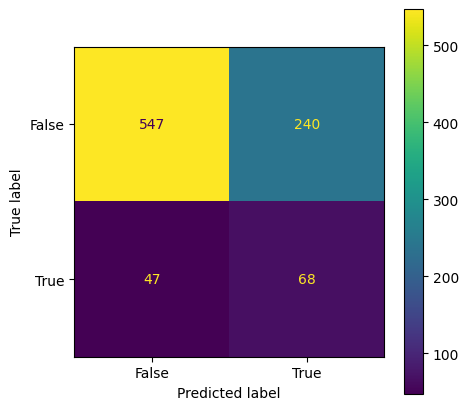

In [141]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [224]:
resultados_modelos['RFC-HT-USamp'] = {'cm': [[547,240],[ 47 , 68]],
  'precision': 0.22,
  'recall': 0.59,
  'f1-score': 0.32}

In [225]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34},
 'Arboles-5FCV': {'cm': [[545, 248], [31, 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36},
 'RFC': {'cm': [[734, 53], [76, 39]],
  'precision': 0.42,
  'recall': 0.34,
  'f1-score': 0.38},
 'RFC-HT': {'cm': [[720, 67], [73, 42]],
  'precision': 0.39,
  'recall': 0.37,
  'f1-score': 0.38},
 'RFC-HT-OSamp': {'cm': [[727, 60], [78, 37]],
  'precision': 0.38,
  'recall': 0.32,
  'f1-score': 0.35},
 'RFC-HT-USamp': {'cm': [[547, 240], [47, 68]],
  'precision': 0.22,
  'recall': 0.59,
  'f1-score': 0.32}}

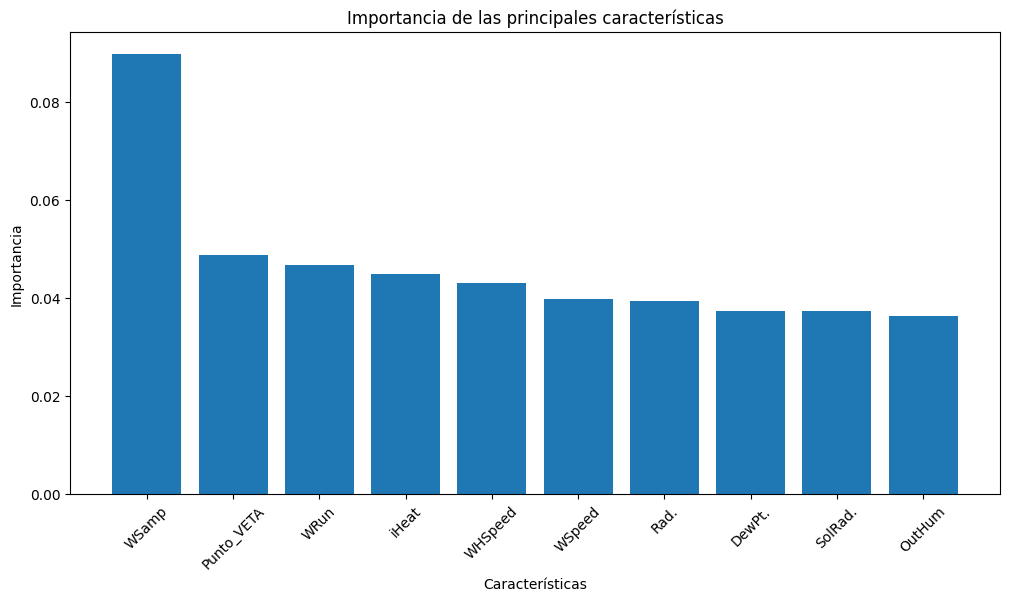

In [142]:
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X.columns[sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(features[:10], feature_importances[sorted_idx][:10])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las principales características")
plt.xticks(rotation=45)
plt.show()

## XGBOOST

In [143]:
!pip install xgboost lightgbm

In [144]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Implementación

In [145]:
# Modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [147]:
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Testeo y resultados

In [148]:
y_pred_xgb = xgb_model.predict(X_test)

In [149]:
# Evaluación para XGBoost
print("Evaluación para XGBoost:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

report_xgboost = classification_report(y_test, y_pred_xgb)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_xgb))

print("F1-score:", f1_score(y_test, y_pred_xgb, average='weighted'))

accuracy_xgboost = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Evaluación para XGBoost:
Matriz de confusión:
[[549 238]
 [ 42  73]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.93      0.70      0.80       787
        True       0.23      0.63      0.34       115

    accuracy                           0.69       902
   macro avg       0.58      0.67      0.57       902
weighted avg       0.84      0.69      0.74       902

F1-score: 0.73891377856818
Accuracy: 0.6895787139689579


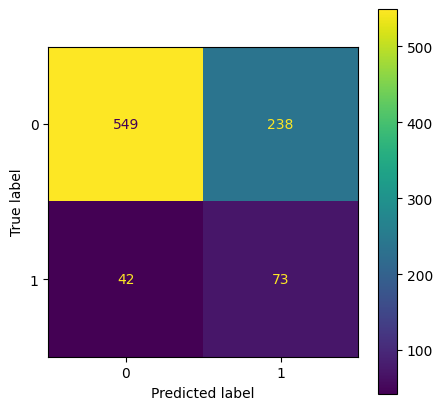

In [150]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [226]:
resultados_modelos['XGBoost'] = {'cm': [[549 , 238],[ 42 , 73]],
  'precision': 0.23,
  'recall': 0.63,
  'f1-score': 0.34}

## LightGBM

### Implementación

In [151]:
# Modelo LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [152]:
lgbm_model.fit(X_train_balanced, y_train_balanced)
y_pred_lgbm = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 267, number of negative: 267
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 534, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

### Testeo y resultados

In [153]:
# Evaluación para LightGBM
print("\nEvaluación para LightGBM:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lgbm))

report_ligh_gbm = accuracy_score(y_test, y_pred_lgbm)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lgbm))

accuracy_ligh_gbm = classification_report(y_test, y_pred_lgbm)
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("F1-score:", f1_score(y_test, y_pred_lgbm, average='weighted'))


Evaluación para LightGBM:
Matriz de confusión:
[[562 225]
 [ 45  70]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.93      0.71      0.81       787
        True       0.24      0.61      0.34       115

    accuracy                           0.70       902
   macro avg       0.58      0.66      0.57       902
weighted avg       0.84      0.70      0.75       902

Accuracy: 0.7006651884700665
F1-score: 0.7470470530973732


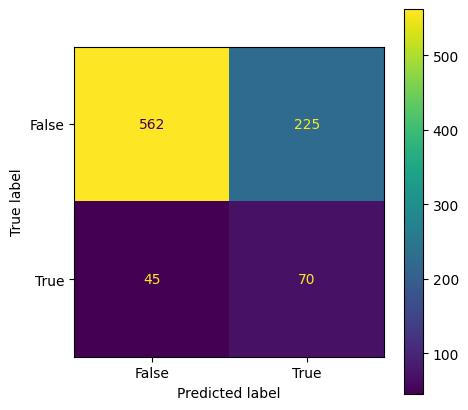

In [154]:
cm = confusion_matrix(y_test, y_pred_lgbm, labels=lgbm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [227]:
resultados_modelos['LGBM'] = {'cm': [[562, 225] , [ 45 , 70]],
  'precision': 0.24,
  'recall': 0.61,
  'f1-score': 0.34}

## REDES NEURONALES

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

### Implementación

In [156]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
# Crear el modelo de red neuronal
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=[Accuracy()])

In [159]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 0.3978
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3482 - val_accuracy: 0.0000e+00 - val_loss: 0.3821
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3070 - val_accuracy: 0.0000e+00 - val_loss: 0.3714
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3070 - val_accuracy: 0.0000e+00 - val_loss: 0.3690
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3007 - val_accuracy: 0.0000e+00 - val_loss: 0.3635
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2807 - val_accuracy: 0.0000e+00 - val_loss: 0.3586
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2811 - val_accuracy: 0.0000e+00 - val_loss: 0.3596
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

### Testeo y resultados

In [160]:
# Evaluar el modelo en el conjunto de prueba
evaluation = model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.5908 


In [161]:
print("Evaluación del modelo:", evaluation)

Evaluación del modelo: [0.5487425327301025, 0.0]


In [162]:
# Hacer predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convertir a valores binarios (umbral 0.5)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [163]:
# Evaluación para Redes Neuronales
print("\nEvaluación para RN:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_rn = accuracy_score(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_rn = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Evaluación para RN:
Matriz de confusión:
[[743  44]
 [ 84  31]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.90      0.94      0.92       787
        True       0.41      0.27      0.33       115

    accuracy                           0.86       902
   macro avg       0.66      0.61      0.62       902
weighted avg       0.84      0.86      0.84       902

Accuracy: 0.8580931263858093
F1-score: 0.844914010229375


In [164]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

In [168]:
print(conf_matrix)

[[743  44]
 [ 84  31]]


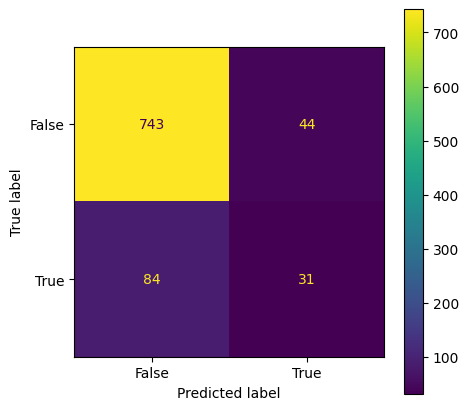

In [169]:
cm = confusion_matrix(y_test, y_pred, labels=[False,  True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [228]:
resultados_modelos['RNeu'] = {'cm': [[743 , 44] ,[ 84 , 31]],
  'precision': 0.41,
  'recall': 0.27,
  'f1-score': 0.33}

In [229]:
resultados_modelos

{'SVM': {'cm': [[787, 0], [58, 57]],
  'precision': 0.93,
  'recall': 0.5,
  'f1-score': 0.66},
 'Arboles': {'cm': [[537, 256], [33, 76]],
  'precision': 0.23,
  'recall': 0.7,
  'f1-score': 0.34},
 'Arboles-5FCV': {'cm': [[545, 248], [31, 78]],
  'precision': 0.24,
  'recall': 0.72,
  'f1-score': 0.36},
 'RFC': {'cm': [[734, 53], [76, 39]],
  'precision': 0.42,
  'recall': 0.34,
  'f1-score': 0.38},
 'RFC-HT': {'cm': [[720, 67], [73, 42]],
  'precision': 0.39,
  'recall': 0.37,
  'f1-score': 0.38},
 'RFC-HT-OSamp': {'cm': [[727, 60], [78, 37]],
  'precision': 0.38,
  'recall': 0.32,
  'f1-score': 0.35},
 'RFC-HT-USamp': {'cm': [[547, 240], [47, 68]],
  'precision': 0.22,
  'recall': 0.59,
  'f1-score': 0.32},
 'XGBoost': {'cm': [[549, 238], [42, 73]],
  'precision': 0.23,
  'recall': 0.63,
  'f1-score': 0.34},
 'LGBM': {'cm': [[562, 225], [45, 70]],
  'precision': 0.24,
  'recall': 0.61,
  'f1-score': 0.34},
 'RNeu': {'cm': [[743, 44], [84, 31]],
  'precision': 0.41,
  'recall': 0.27,

## KNN

In [171]:
data = pd.get_dummies(df_polvo, columns=['Punto'], drop_first=True)

In [172]:
# Separar variables predictoras y objetivo
X = data.drop(columns=['clase', 'Date'])  # Eliminamos la columna 'Date' si no aporta
y = data['clase']

In [173]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Corrección: Asegúrate de imprimir la información de X_train después de la división
print("Número de muestras en X_train después de dividir:", X_train.shape[0])
print("Número de etiquetas en y_train después de dividir:", len(y_train))

Número de muestras en X_train después de dividir: 2104
Número de etiquetas en y_train después de dividir: 2104


In [174]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler al conjunto de entrenamiento y transformarlo
X_train_scaled = scaler.fit_transform(X_train)

# Convertir el resultado a DataFrame para mejor manejo
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [175]:
# Ajustar el scaler al conjunto de entrenamiento y transformarlo
X_test_scaled = scaler.fit_transform(X_test)

# Convertir el resultado a DataFrame para mejor manejo
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test = X_test_scaled_df

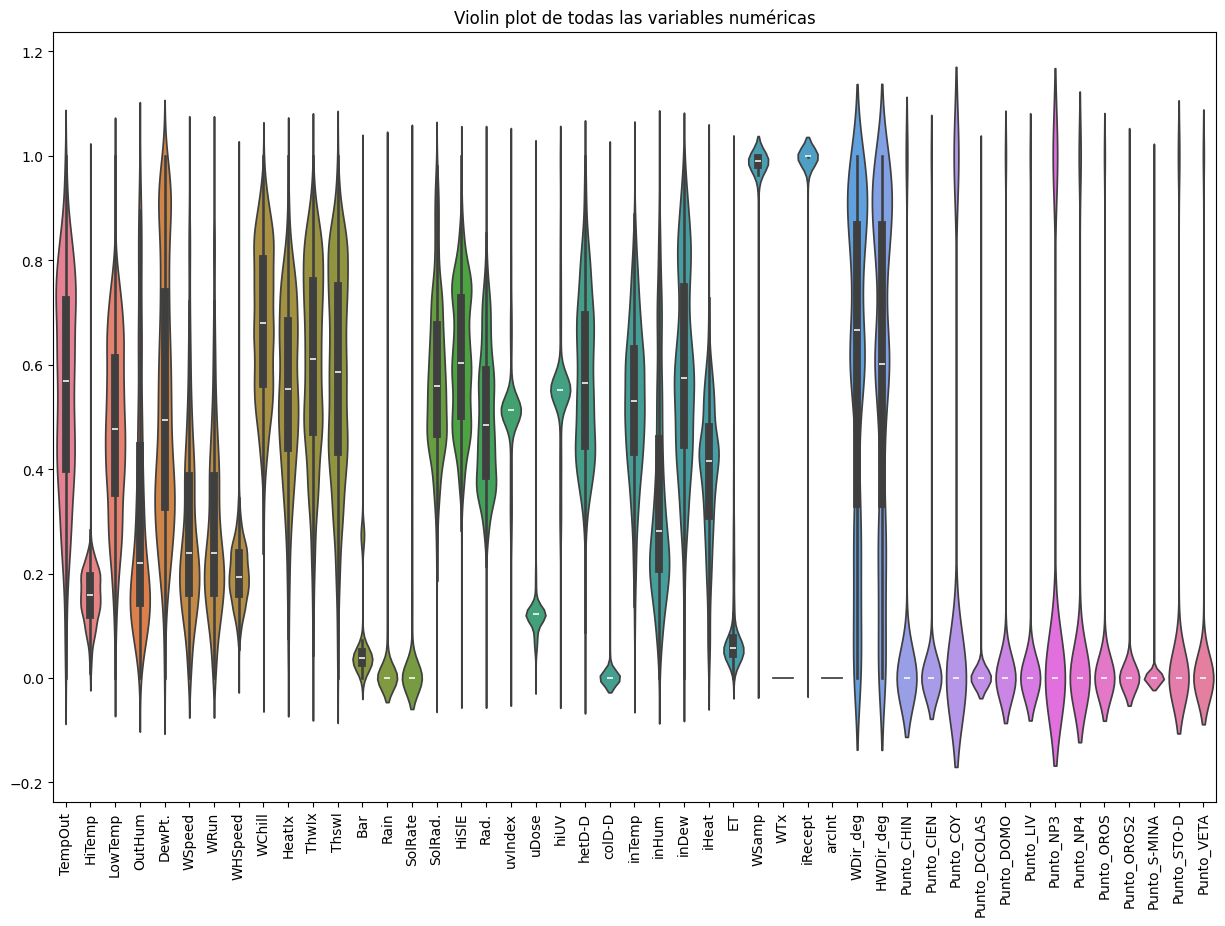

In [176]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño del gráfico según necesites
sns.violinplot(data=X_train_scaled_df)
plt.xticks(rotation=90)  # Rota las etiquetas para que sean legibles
plt.title('Violin plot de todas las variables numéricas')
plt.show()

### Busqueda aleatoria (RamdomizedSearch)

In [177]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [178]:
# Asumimos que 'X_train_scaled_df' y 'y_train' están definidos y listos para usar
X_train = X_train_scaled_df  # Usando el DataFrame correctamente nombrado

In [179]:
# Configuración del clasificador KNN
classifier_knn = KNeighborsClassifier()

In [180]:
# Definición de los hiperparámetros a probar
hyperparams = {
    "n_neighbors": np.arange(1, 15),  # Cantidad de vecinos
    "weights": ["uniform", "distance"],  # Cómo se pesan los votos
    "p": np.arange(1.0, 30.0)  # Valores para la distancia de Minkowski
}

In [187]:
# Configuración de RandomizedSearchCV
random = RandomizedSearchCV(
    estimator=classifier_knn,  # Modelo base
    param_distributions=hyperparams,  # Espacio de búsqueda de hiperparámetros
    n_iter=100,  # Número de combinaciones aleatorias a probar
    refit=False,  # No se ajusta automáticamente con los mejores hiperparámetros encontrados
    cv=5,  # Cantidad de validación cruzada
    scoring='f1',  # Métrica que busco maximizar
    n_jobs=-1,  # Usar todos los threads y CPUs disponibles
    verbose=3,  # Mostrar progreso
    random_state=42  # Para reproducibilidad
)

In [190]:
# Ejecutar la búsqueda por grilla con los datos de entrenamiento
random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29.]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, refit=False, scoring='f1', verbose=3)

In [191]:
# Mostrar los mejores parámetros encontrados y la mejor puntuación
print("Mejores parámetros encontrados:", random.best_params_)
print("Mejor puntuación F1:", random.best_score_)

Mejores parámetros encontrados: {'weights': 'distance', 'p': 18.0, 'n_neighbors': 4}
Mejor puntuación F1: 0.29011758822590683


In [192]:
best_knn_grid = KNeighborsClassifier(**random.best_params_)
best_knn_grid.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=18.0, weights='distance')

In [193]:
#Evaluamos
y_pred  = best_knn_grid.predict(X_test)

In [194]:
# Evaluación KNN
print("\nEvaluación para RN:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_rn = accuracy_score(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_rn = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Evaluación para RN:
Matriz de confusión:
[[747  40]
 [ 90  25]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       787
        True       0.38      0.22      0.28       115

    accuracy                           0.86       902
   macro avg       0.64      0.58      0.60       902
weighted avg       0.83      0.86      0.84       902

Accuracy: 0.8558758314855875
F1-score: 0.8380772460881796


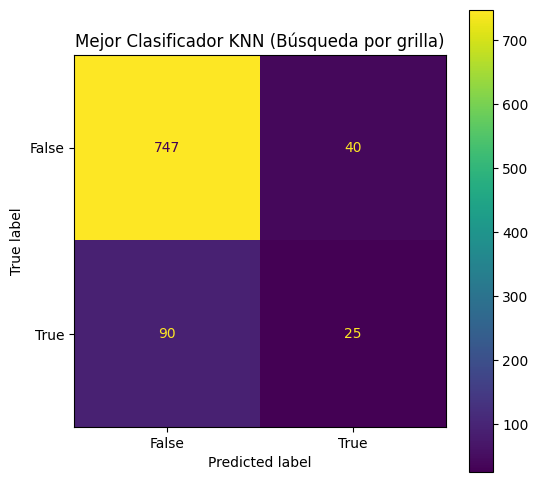

In [195]:
#Evaluamos
y_pred  = best_knn_grid.predict(X_test)

cm_best_knn_grid = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_grid,
                              display_labels=best_knn_grid.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador KNN (Búsqueda por grilla)");

In [230]:
resultados_modelos['KNN-RSh'] = {'cm': [[747 , 40], [ 90 ,25]],
  'precision': 0.38,
  'recall': 0.22,
  'f1-score': 0.28}

### Optuna

In [196]:
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 100)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    p = trial.suggest_float("p", 1.0, 100.0)

    classifier_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

    # Realizamos la validación cruzada
    score = cross_val_score(classifier_knn, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)

    return score.mean()

In [197]:
def champion_callback(study, frozen_trial):
    """
    Mostramos menos información, sino es demasiado verboso
    """

    winner = study.user_attrs.get("winner", None)

    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [199]:
# Creamos un estudio de Optuna
# Optuna es un poco verboso, dejamos que solo nos muestre logs de errores
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, callbacks=[champion_callback])

Initial trial 0 achieved value: 0.25435109906654624
Trial 1 achieved value: 0.269014385415183 with  5.4507% improvement
Trial 2 achieved value: 0.2721427413940783 with  1.1495% improvement
Trial 31 achieved value: 0.27296918767507 with  0.3028% improvement


In [200]:
# Obtenemos los mejores hiperparámetros encontrados
best_params = study.best_params
best_params

{'n_neighbors': 60, 'weights': 'distance', 'p': 7.6818098992835875}

In [201]:
# Creamos el clasificador KNeighborsClassifier con los mejores hiperparámetros
classifier_knn_optuna = KNeighborsClassifier(**best_params)
# Entrenamos el clasificador con los datos de entrenamiento
classifier_knn_optuna.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60, p=7.6818098992835875, weights='distance')

In [203]:
#Evaluamos
y_pred  = classifier_knn_optuna.predict(X_test)

In [205]:
# Evaluación KNN Optuna
print("\nEvaluación para RN:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

report_rn = accuracy_score(y_test, y_pred)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_rn = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Evaluación para RN:
Matriz de confusión:
[[771  16]
 [ 98  17]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       787
        True       0.52      0.15      0.23       115

    accuracy                           0.87       902
   macro avg       0.70      0.56      0.58       902
weighted avg       0.84      0.87      0.84       902

Accuracy: 0.8736141906873615
F1-score: 0.8417310229346285


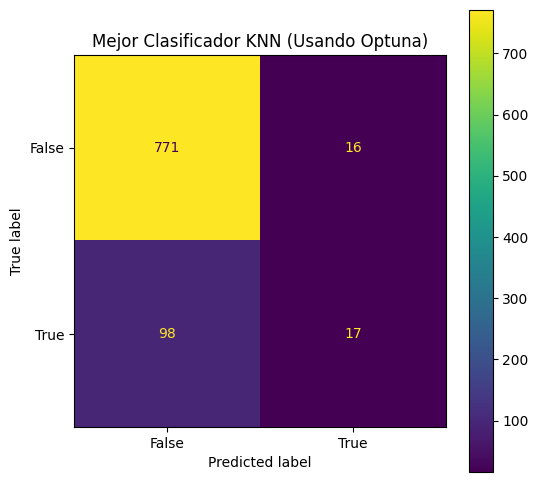

In [206]:
cm_best_knn_optuna = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_optuna,
                              display_labels=classifier_knn_optuna.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Mejor Clasificador KNN (Usando Optuna)");

In [231]:
resultados_modelos['KNN-Optuna'] = {'cm': [[771 , 16] ,[ 98, 17]],
  'precision': 0.52,
  'recall': 0.15,
  'f1-score': 0.23}

# Interpretación de los Resultados de Modelos

In [234]:
pd.DataFrame(resultados_modelos).T

,cm,precision,recall,f1-score
SVM,"[[787, 0], [58, 57]]",0.93,0.5,0.66
Arboles,"[[537, 256], [33, 76]]",0.23,0.7,0.34
Arboles-5FCV,"[[545, 248], [31, 78]]",0.24,0.72,0.36
RFC,"[[734, 53], [76, 39]]",0.42,0.34,0.38
RFC-HT,"[[720, 67], [73, 42]]",0.39,0.37,0.38
RFC-HT-OSamp,"[[727, 60], [78, 37]]",0.38,0.32,0.35
RFC-HT-USamp,"[[547, 240], [47, 68]]",0.22,0.59,0.32
XGBoost,"[[549, 238], [42, 73]]",0.23,0.63,0.34
LGBM,"[[562, 225], [45, 70]]",0.24,0.61,0.34
RNeu,"[[743, 44], [84, 31]]",0.41,0.27,0.33




A continuación, se presenta el análisis de los modelos en función de las métricas de **Precisión**, **Recall** y **F1-Score**, calculadas respecto a la **clase positiva (True)**. También se analiza la matriz de confusión (cm) de cada modelo.

## **Resultados por Modelo**

### **1. SVM (Support Vector Machine)**
- **Matriz de Confusión:** `[[787, 0], [58, 57]]`
  - **TP:** 57, **FN:** 58, **TN:** 787, **FP:** 0
- **Precisión:** 0.93
- **Recall:** 0.50
- **F1-Score:** 0.66
- **Interpretación:** Muy preciso al predecir positivos, pero con un recall bajo (solo identifica el 50% de los casos positivos).

---

### **2. Árboles de Decisión (sin CV)**
- **Matriz de Confusión:** `[[537, 256], [33, 76]]`
- **Precisión:** 0.23
- **Recall:** 0.70
- **F1-Score:** 0.34
- **Interpretación:** Alto recall, pero extremadamente baja precisión debido a numerosos falsos positivos.

---

### **3. Árboles de Decisión (5-Fold CV)**
- **Matriz de Confusión:** `[[545, 248], [31, 78]]`
- **Precisión:** 0.24
- **Recall:** 0.72
- **F1-Score:** 0.36
- **Interpretación:** Validación cruzada mejora el recall, aunque la precisión sigue siendo baja.

---

### **4. Random Forest Clásico (RFC)**
- **Matriz de Confusión:** `[[734, 53], [76, 39]]`
- **Precisión:** 0.42
- **Recall:** 0.34
- **F1-Score:** 0.38
- **Interpretación:** Desempeño equilibrado, pero moderado.

---

### **5. RFC con Optimización de Hiperparámetros (RFC-HT)**
- **Matriz de Confusión:** `[[720, 67], [73, 42]]`
- **Precisión:** 0.39
- **Recall:** 0.37
- **F1-Score:** 0.38
- **Interpretación:** Ligera mejora en recall respecto al RFC base.

---

### **6. RFC con Oversampling (RFC-HT-OSamp)**
- **Matriz de Confusión:** `[[727, 60], [78, 37]]`
- **Precisión:** 0.38
- **Recall:** 0.32
- **F1-Score:** 0.35
- **Interpretación:** Oversampling balancea las clases, pero reduce recall.

---

### **7. RFC con Undersampling (RFC-HT-USamp)**
- **Matriz de Confusión:** `[[547, 240], [47, 68]]`
- **Precisión:** 0.22
- **Recall:** 0.59
- **F1-Score:** 0.32
- **Interpretación:** Mejora recall, pero la precisión disminuye drásticamente debido al aumento de falsos positivos.

---

### **8. XGBoost**
- **Matriz de Confusión:** `[[549, 238], [42, 73]]`
- **Precisión:** 0.23
- **Recall:** 0.63
- **F1-Score:** 0.34
- **Interpretación:** Prioriza recall, pero tiene una precisión muy baja.

---

### **9. LightGBM (LGBM)**
- **Matriz de Confusión:** `[[562, 225], [45, 70]]`
- **Precisión:** 0.24
- **Recall:** 0.61
- **F1-Score:** 0.34
- **Interpretación:** Muy similar a XGBoost, con enfoque en recall.

---

### **10. Red Neuronal (RNeu)**
- **Matriz de Confusión:** `[[743, 44], [84, 31]]`
- **Precisión:** 0.41
- **Recall:** 0.27
- **F1-Score:** 0.33
- **Interpretación:** Baja capacidad para identificar positivos, aunque tiene menos falsos positivos que otros modelos.

---

### **11. KNN con Random Search (KNN-RSh)**
- **Matriz de Confusión:** `[[747, 40], [90, 25]]`
- **Precisión:** 0.38
- **Recall:** 0.22
- **F1-Score:** 0.28
- **Interpretación:** Mal desempeño general con recall muy bajo.

---

### **12. KNN con Optimización (KNN-Optuna)**
- **Matriz de Confusión:** `[[771, 16], [98, 17]]`
- **Precisión:** 0.52
- **Recall:** 0.15
- **F1-Score:** 0.23
- **Interpretación:** Precisión ligeramente mejor, pero el recall sigue siendo extremadamente bajo.

---

## **Recomendación Final**

### **1. Mejor modelo general:**
- **SVM (Support Vector Machine)**:
  - Buen balance entre precisión y recall.
  - Ideal si la precisión es más importante.

### **2. Modelos con alto recall:**
- **Árboles con validación cruzada (Arboles-5FCV)** y **XGBoost**:
  - Útiles para maximizar la identificación de positivos, pero generan más falsos positivos.

### **3. Alternativa robusta:**
- **RFC-HT**:
  - Modelo equilibrado, aunque no sobresale en ninguna métrica.

